<br>
<img src="https://sites.google.com/a/chesterqualls.com/chester-qualls-is-it/ChesterQualls%20Logo%28small%29.png?revision=2">
<br>
***
# A Mind t-test Examples

> These t-test Examples are based on "clean data" as determined from the R Code done by JW, there may be remaining questions that need to be answered before this can be considered completely accurate.

> * This document includes python(and certain libraries) code, please ignore that part if you desire.

> #### <span style="color:red">Not sure if I'm applying everything correctly here, suggestions welcome.</span>


In [1]:
import pandas as pd
import scipy
from scipy import stats
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams

import os

#This next line supresses warning message, which may be nice before exporting to send
#pd.options.mode.chained_assignment = None
pd.set_option('chained_assignment','warn')

os.chdir("c:/Users/Chester Qualls/Desktop/Customers/EDU_Example")

print (os.getcwd())

c:\Users\Chester Qualls\Desktop\Customers\EDU_Example


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 6, 4
sb.set_style('whitegrid')

In [3]:
#import data
am_enroll_clean = pd.read_pickle('pickles/am_enroll_clean.pickle')
am_assess_clean = pd.read_pickle('pickles/am_assess_clean.pickle')

#join data
am_enroll_assess = pd.merge(am_enroll_clean, am_assess_clean, how='inner', on=['researchid','schoolcode', 'schoolyear'])

#select specific criteria SBA-Math Only, 8th Graders
am_8 = am_enroll_assess.loc[(am_enroll_assess['testgrade'] == 8) & (am_enroll_assess['testtype']=='SBA')
                                  & (am_enroll_assess['subject']=='Smarter Balanced Math')]

#use only some rows
am_8 = am_8[['researchid', 'comparison','cohort','schoolyear', 'testgrade','testtype',
                              'performancelevel','scalescore','subject']]

#clean up dataframes no longer used
del am_enroll_clean
del am_assess_clean
del am_enroll_assess

print ('Done')

Done


## First, some looks at the data 

Here we will be doing a t-test of the SBA-Math Only scale scores for 8th graders between the Cohort and Comparison groups. Above we imported the clean data files, joined the tables so that we ended up with only scores for people with enrollment records.  We further limited the data with criteria ['testgrade'] == 8 & ['testtype']=='SBA' & ['subject']=='Smarter Balanced Math'

> But to begin we are going to get some summary of the data broken down by 
> * Cohort or Comparison, and the Performance Levels
* This table shows count, mean, standard deviation, minimum and maximum values for each group. First broken down by performance levels and then just by cohort v. comparison.

In [55]:
am_8_summary = am_8.groupby(['cohort','testtype','performancelevel']).agg({'researchid':'count'
                                                    ,'scalescore': ['mean','std','min','max']})

am_8_summary

researchid   scalescore                     \
                                      count         mean        std     min   
cohort testtype performancelevel                                              
0      SBA      L1                      500  2430.668000  56.079976  2183.0   
                L2                      462  2545.768398  24.003535  2504.0   
                L3                      373  2617.587131  18.966752  2586.0   
                L4                      349  2713.822350  51.121924  2653.0   
1      SBA      L1                      431  2429.269142  61.054584  2113.0   
                L2                      380  2545.778947  23.451597  2504.0   
                L3                      261  2619.180077  19.438516  2586.0   
                L4                      325  2711.504615  44.443099  2653.0   

                                          
                                     max  
cohort testtype performancelevel          
0      SBA      L1                2503.0  
                L2                2585.0  
                L3                2652.0  
                L4                2993.0  
1      SBA      L1                2503.0  
                L2                2585.0  
                L3                2652.0  
                L4                2879.0

In [58]:
am_8_stats = am_8.groupby(['cohort','testtype']).agg({'researchid':'count'
                                                    ,'scalescore': ['mean','std','min','max']})

am_8_stats

researchid   scalescore                            
                     count         mean         std     min     max
cohort testtype                                                    
0      SBA            1684  2562.329572  111.226197  2183.0  2993.0
1      SBA            1397  2562.101646  114.682449  2113.0  2879.0

## Plots begin

This first boxplot displays much of the same information that was in the above table.

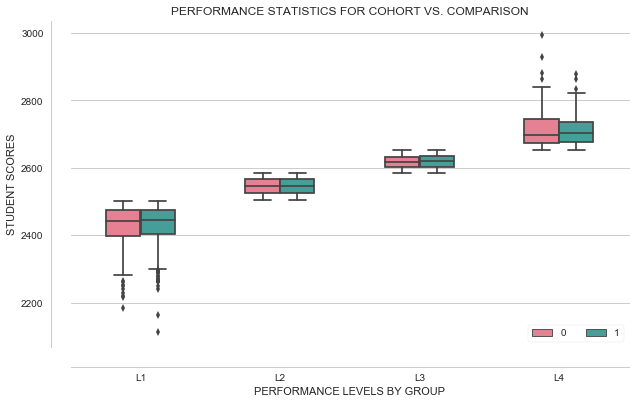

In [188]:
#could do a nice plot to display this and more.

rcParams['figure.figsize'] = 10, 6

sb.boxplot(x="performancelevel", y="scalescore", hue="cohort", order=('L1', 'L2','L3','L4'), data=am_8, width=.5, palette="husl")
plt.title('PERFORMANCE STATISTICS FOR COHORT VS. COMPARISON')
plt.xlabel('PERFORMANCE LEVELS BY GROUP')
plt.ylabel('STUDENT SCORES')
plt.legend(ncol=2,loc='lower right',frameon=True)
sb.despine(offset=20, trim=False)

> Here we will zoom in on the boxplot for just the performance level L2.

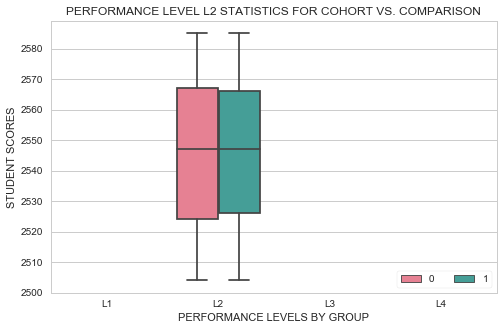

In [62]:
#could do a nice plot to display this and more.

rcParams['figure.figsize'] = 8, 5

am_8_l2 = am_8.loc[(am_8['performancelevel'] == 'L2')]

sb.boxplot(x="performancelevel", y="scalescore", hue="cohort", order=('L1', 'L2','L3','L4'), data=am_8_l2, width = .75,
           palette="husl")
plt.title('PERFORMANCE LEVEL L2 STATISTICS FOR COHORT VS. COMPARISON')
plt.xlabel('PERFORMANCE LEVELS BY GROUP')
plt.ylabel('STUDENT SCORES')
plt.legend(ncol=2,loc='lower right',frameon=True)

> This next plot shows much of the same info as the first boxplot but in 4 separate graphs.  This uses a plot called FacetGrid from Seaborn.

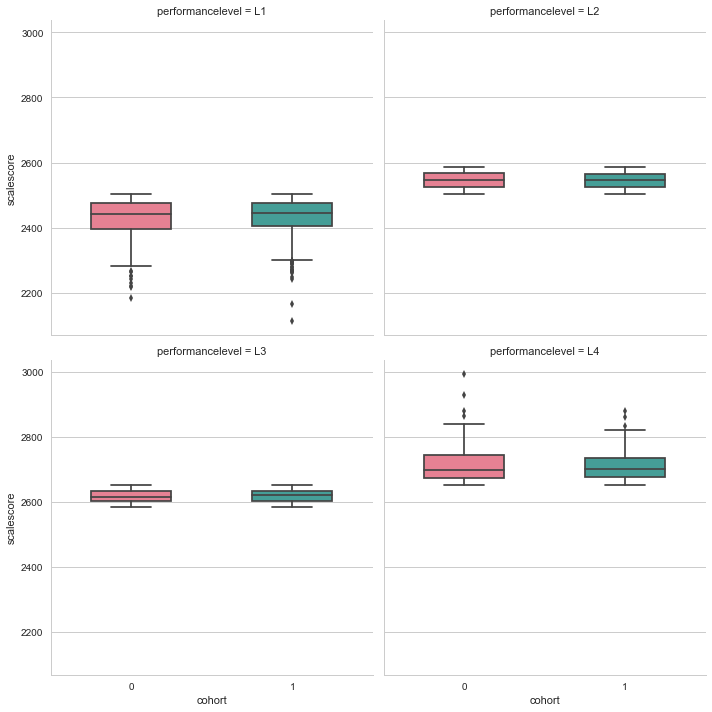

In [6]:
#sb.set(style="ticks")

# Initialize a grid of plots with an Axes for each performance level
grid = sb.FacetGrid(am_8, col="performancelevel", col_order=('L1', 'L2','L3','L4'), col_wrap=2, size=5)

# Draw the plots
grid.map(sb.boxplot,'cohort', 'scalescore',width= .5, palette="husl")


## The actual t-test results

In this section, the t-test function returns two numbers.  First is the t-test correlation result, and the second is the p value.  To be significant the p-value should be less than α (p < α).  Alpha is often .05 or 5%.

#### The result of comparing this cohort to the comparison group does not appear to meet this standard

> This suggests there is not sufficent evidence that the mean scores of the two data sets are any different. In general this may be expected because at this early stage of the research project the similarity of means may be by design. As the years progress it will be determined if the intervention is working by finding if the cohort group makes improvement while the comparison group does not.
<br><br>
> **Note from scipy.org about ttest_ind:**  We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [73]:
#prepare data and analyize
am_8_cohort = am_8.loc[(am_8['cohort'] == 1)]
am_8_cohort = am_8_cohort[['scalescore']]

am_8_comp = am_8.loc[(am_8['comparison'] == 1)]
am_8_comp = am_8_comp[['scalescore']]

am_8_ttest = stats.ttest_ind(am_8_comp, am_8_cohort,equal_var=True, nan_policy='omit')
#If equal_var=False would be Welch's t-test, which does not assume equal population variance.

am_8_ttest
#am_8_comp.info()

Ttest_indResult(statistic=array([ 0.05583208]), pvalue=array([ 0.9554792]))

> And this plot shows the distribution curve for the data.  It shows separate curves for the Cohort scalescores and the Comparison scalescores.  

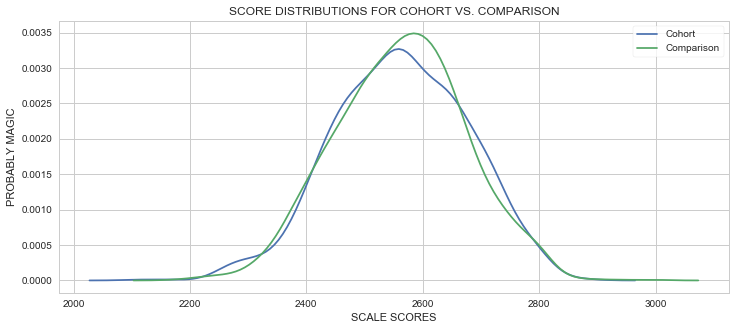

In [31]:
#Plot the data

rcParams['figure.figsize'] = 12, 5

sb.distplot(am_8_cohort, bins=None, hist=False, 
            label='Cohort')
sb.distplot(am_8_comp, bins=None, hist=False, 
            label='Comparison')

plt.title('SCORE DISTRIBUTIONS FOR COHORT VS. COMPARISON')
plt.xlabel('SCALE SCORES')
plt.ylabel('PROBABLY MAGIC')
plt.legend(ncol=1,loc='upper right',frameon=True)

### Let's test on a different value— 'Gender'

#### The result of comparing males to females of the combined cohort/comp groups is significant

> This suggests there is sufficent evidence that the mean scores of the two data sets are different.<br>
> We could reject the null hypothesis

In [32]:
#import data
am_enroll_clean = pd.read_pickle('pickles/am_enroll_clean.pickle')
am_assess_clean = pd.read_pickle('pickles/am_assess_clean.pickle')

#join data
am_enroll_assess = pd.merge(am_enroll_clean, am_assess_clean, how='inner', on=['researchid','schoolcode', 'schoolyear'])

#select specific criteria SBA-Math Only, 8th Graders
am_8 = am_enroll_assess.loc[(am_enroll_assess['testgrade'] == 8) & (am_enroll_assess['testtype']=='SBA')
                                  & (am_enroll_assess['subject']=='Smarter Balanced Math')]

#use only some rows
am_8 = am_8[['researchid', 'comparison','cohort','schoolyear', 'testgrade','testtype', 'gender',
                              'performancelevel','scalescore','subject']]

#clean up dataframes no longer used
del am_enroll_clean
del am_assess_clean
del am_enroll_assess

print ('Done')

Done


### The t-test by Gender results
* And then a plot

In [70]:
#prepare data and analyize
am_8_male = am_8.loc[(am_8['gender'] == 1)]
am_8_male = am_8_male[['scalescore']]

am_8_female = am_8.loc[(am_8['gender'] == 0)]
am_8_female = am_8_female[['scalescore']]

print (stats.ttest_ind(am_8_male, am_8_female,equal_var=True, nan_policy='omit')) #doesn't create a named array with results

Ttest_indResult(statistic=array([-3.16203878]), pvalue=array([ 0.00158192]))


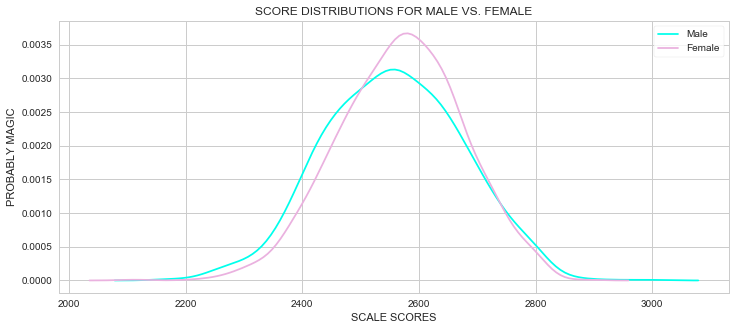

In [76]:
#Plot the data

rcParams['figure.figsize'] = 12, 5

sb.distplot(am_8_male, bins=None, hist=False, label='Male', color='#00ffec')
sb.distplot(am_8_female, bins=None, hist=False, label='Female', color='#eab1df')

plt.title('SCORE DISTRIBUTIONS FOR MALE VS. FEMALE')
plt.xlabel('SCALE SCORES')
plt.ylabel('PROBABLY MAGIC')
plt.legend(ncol=1,loc='upper right',frameon=True)